## Importando as bibliotecas

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
import seaborn as sns

## Importando os chutes:

In [95]:
kick1=np.loadtxt( 'kick1.dat' )
kick1=pd.DataFrame(kick1)
kick2=np.loadtxt( 'kick2.dat' )
kick2=pd.DataFrame(kick2)
kick1.columns=['x','y','z']
kick2.columns=['x','y','z']

## Função que imprime o campo:

In [96]:
def draw_pitch(ax,p):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0*p,0*p],[-20*p,20*p], color="black")
    plt.plot([0*p,40*p],[20*p,20*p], color="black")
    plt.plot([40*p,40*p],[20*p,-20*p], color="black")
    plt.plot([40*p,0*p],[-20*p,-20*p], color="black")
    plt.plot([40*p,40*p],[-20*p,20*p], color="black")

    #Left Penalty Area
    plt.plot([14.6*p,14.6*p],[17.8*p,-17.5*p],color="black")
    plt.plot([0*p,14.6*p],[17.8*p,17.5*p],color="black")
    plt.plot([0*p,14.6*p],[-17.5*p,-17.5*p],color="black")

    #Left 6-yard Box
    plt.plot([0*p,4.9*p],[8*p,8*p],color="black")
    plt.plot([4.9*p,4.9*p],[8*p,-8*p],color="black")
    plt.plot([0*p,4.9*p],[-8*p,-8*p],color="black")

    #Prepare Circles
    centreCircle = Arc((45*p,0*p),height=16.2*p,width=16.2*p,angle=0,theta1=130,theta2=230,color="black")
    centreSpot = plt.Circle((40*p,0*p),0.71*p,color="black")
    leftPenSpot = plt.Circle((9.7*p,0*p),0.71*p,color="black")
    rightPenSpot = plt.Circle((110.3*p,0*p),0.71*p,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)


    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7*p,0*p),height=16.2*p,width=16.2*p,angle=0,theta1=310,theta2=50,color="black")
    

    #Draw Arcs
    ax.add_patch(leftArc)

In [142]:
'''Construindo o tempo para 20 posições da bola no chute, dado que os dados são capturados a uma taxa de 
60 frames por segundo. Ou seja, cada posição da bola leva 0.016666667 segundos para ser capturado'''
i=0
T_full=[]
x=0.016666667
y=0
while i<=60:
    y=y+x
    T_full.append(y)
    i+=1
T=T_full[:20]
kick1['t']=T
kick2['t']=T

## Verificando os chutes no campo:

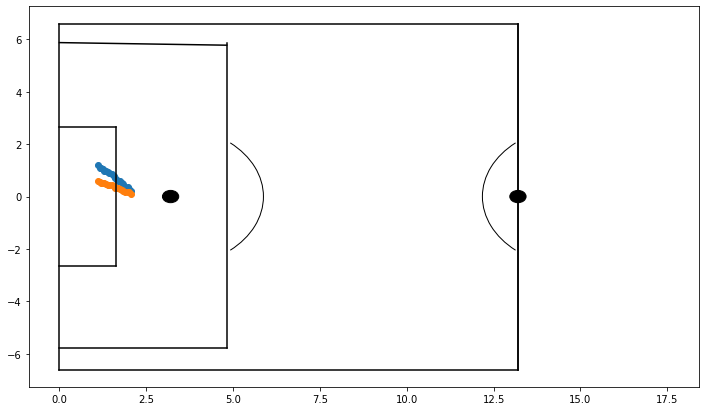

In [143]:
#eixos do kick1
X1=-kick1.x
Y1=kick1.y
Z1=kick1.z

#eixos do kick2
X2=-kick2.x
Y2=kick2.y
Z2=kick2.z

#plotando a figura dos kicks para os eixos x e y --> Notar que os eixos estão invertidos!!!
fig=plt.figure()
fig.set_size_inches(12, 7)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax,0.33)
plt.scatter(Y1, X1)
plt.scatter(Y2, X2)
plt.show()

# Análise exploratória

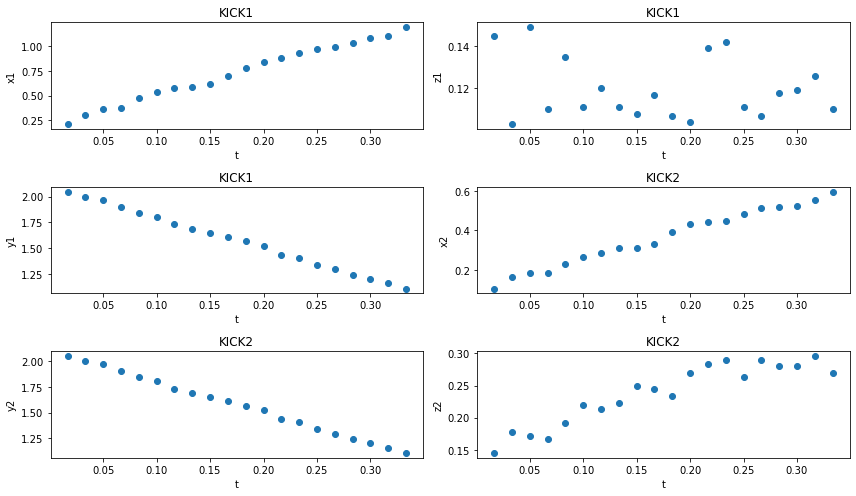

In [144]:
# ANALISANDO OS EIXOS KICK 1

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(12, 7)
# Axis 1
axs[0, 0].scatter(T, X1)
axs[0, 0].set(xlabel='t', ylabel='x1')
axs[0, 0].set_title("KICK1")
# Axis 2
axs[1, 0].scatter(T, Y1)
axs[1, 0].set(xlabel='t', ylabel='y1')
axs[1, 0].set_title("KICK1")
# Axis 3
axs[0, 1].scatter(T, Z1)
axs[0, 1].set(xlabel='t', ylabel='z1')
axs[0, 1].set_title("KICK1")
# Axis 4
axs[1, 1].scatter(T, X2)
axs[1, 1].set(xlabel='t', ylabel='x2')
axs[1, 1].set_title("KICK2")
# Axis 4
axs[2, 0].scatter(T, Y2)
axs[2, 0].set(xlabel='t', ylabel='y2')
axs[2, 0].set_title("KICK2")
# Axis 4
axs[2, 1].scatter(T, Z2)
axs[2, 1].set(xlabel='t', ylabel='z2')
axs[2, 1].set_title("KICK2")

fig.tight_layout()

In [145]:
kick1.describe()

,x,y,z,t
count,20.000000,20.000000,20.000000,20.000000
mean,-0.727700,1.576650,0.119600,0.175000
std,0.294473,0.295319,0.014605,0.098601
min,-1.192000,1.109000,0.103000,0.016667
25%,-0.974000,1.328750,0.109500,0.095833
50%,-0.742500,1.589500,0.114000,0.175000
75%,-0.519000,1.815500,0.128250,0.254167
max,-0.210000,2.048000,0.149000,0.333333


In [146]:
kick2.describe()

,x,y,z,t
count,20.000000,20.000000,20.000000,20.000000
mean,-0.363200,1.576650,0.237800,0.175000
std,0.146036,0.295319,0.047159,0.098601
min,-0.596000,1.109000,0.145000,0.016667
25%,-0.491500,1.328750,0.207750,0.095833
50%,-0.361000,1.589500,0.247000,0.175000
75%,-0.257000,1.815500,0.280250,0.254167
max,-0.105000,2.048000,0.296000,0.333333


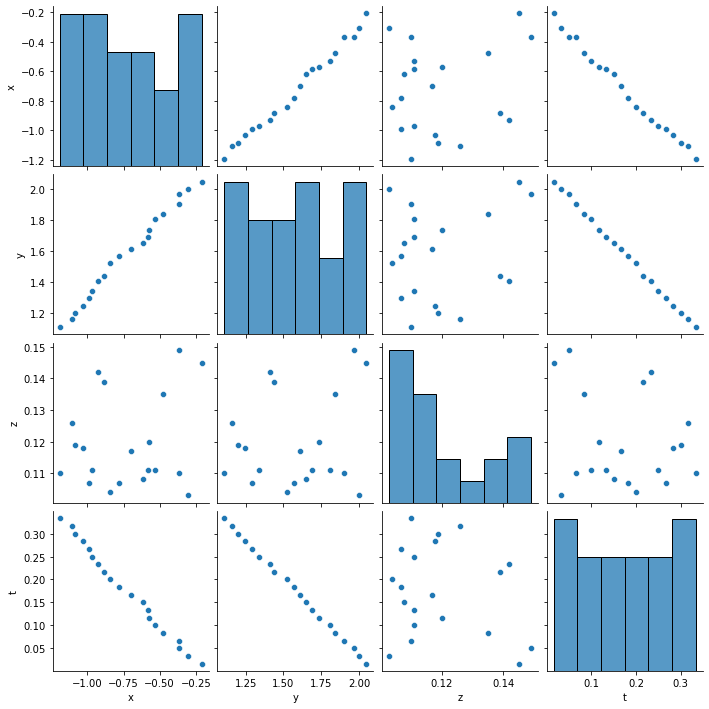

In [102]:
sns.pairplot(kick1)

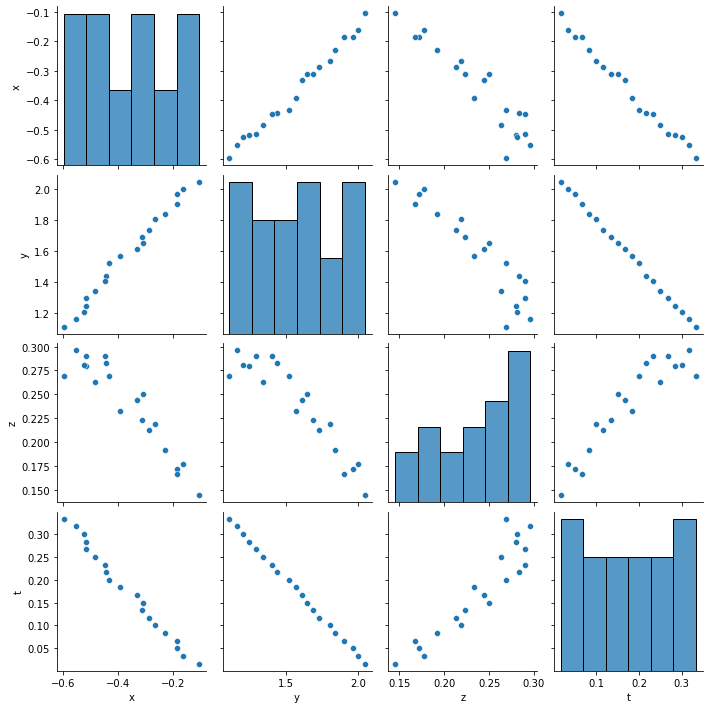

In [103]:
sns.pairplot(kick2)

# Construindo o modelo de Regressão Linear

## Equações:

Devemos estabelecer um modelo de regressão para cada eixo, baseado no tempo.
<br><br>
$X=$ $\alpha_1*t$ + $\beta_1$ + $\epsilon$<br>
$Y=$ $\alpha_2*t$ + $\beta_2$ + $\epsilon$<br>
$Z=$ $\alpha_3*t$ + $\beta_3$ + $\epsilon$

### Definindo as funções de custo, de pesos e de fit_linear

In [104]:
def cost_function(T,X,alpha,beta):
    '''MSE   RMSE'''
    x_hat_list=[]
    total_error=0.0
    N=len(X)
    for i in range(N):
        x_hat = alpha * T[i] + beta
        x_hat_list.append(x_hat)
        total_error += (X[i] - x_hat )**2
    mse = total_error/N
    rmse = np.sqrt(mse)
    return mse , rmse , x_hat_list


def update_weights(T,X,alpha,beta,learning_rate):
    alpha_deriv=0
    beta_deriv=0
    N=len(X)
    for i in range(N):
        alpha_deriv += -2*T[i] * (X[i] - (alpha*T[i] + beta))
        beta_deriv += -2 * (X[i] - (alpha*T[i] + beta))
    alpha -= (alpha_deriv / float(N)) * learning_rate
    beta -= (beta_deriv / float(N)) * learning_rate
    return alpha, beta



def fit_linear(T, X, alpha, beta, learning_rate, iters):
    cost_history = []
    space_inter=iters/5
    mse_fim=0
    rmse_fim=0
    for i in range(int(iters)):
        alpha,beta = update_weights(T, X, alpha, beta, learning_rate)

        #Calculate cost for auditing purposes
        mse_ini,rmse_ini,x_hat = cost_function(T, X, alpha, beta)
        cost_history.append(rmse_ini)
        
        #Checking for the tolerance of the error
        tol_rmse = np.abs(rmse_ini-rmse_fim)
        tol_mse = np.abs(mse_ini-mse_fim)
        if tol_rmse < 1e-10:
            break
        mse_fim=mse_ini
        rmse_fim=rmse_ini
        
        # Log Progress
        if i % space_inter == 0:
            print ("iter={:d}    alpha={:.2f}    beta={:.4f}    MSE={:.2}     RMSE={:.2}".format(i, alpha, beta, mse_fim, rmse_fim))
            plt.scatter(T,X)
            plt.plot(T,x_hat,c='red')
            plt.show()
    return alpha, beta, cost_history, i

### Definindo as variáveis globais

In [105]:
alpha_inicial=0
beta_inicial=0
learning_rate=1e-2
inters=30000

## KICK 1

### Fitting X for kick1

iter=0    alpha=0.00    beta=0.0146    MSE=0.59     RMSE=0.77


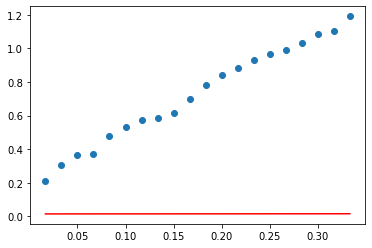

iter=6000    alpha=2.00    beta=0.3789    MSE=0.0094     RMSE=0.097


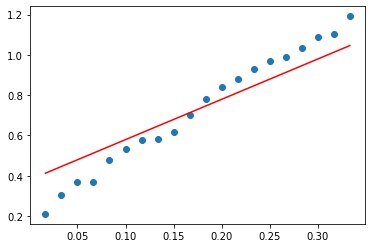

iter=12000    alpha=2.64    beta=0.2659    MSE=0.0017     RMSE=0.042


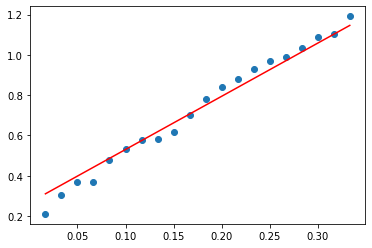

iter=18000    alpha=2.86    beta=0.2273    MSE=0.00084     RMSE=0.029


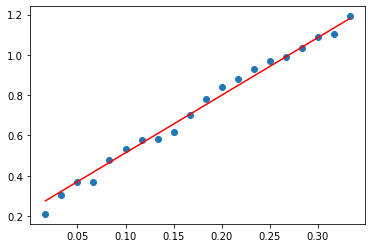

iter=24000    alpha=2.93    beta=0.2142    MSE=0.00073     RMSE=0.027


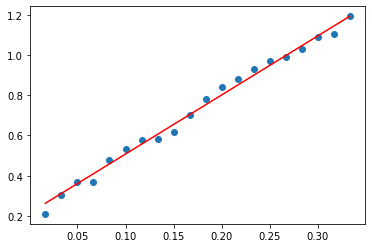

In [122]:
alpha1_K1,beta1_K1,cost_history1_K1,end_inter1_K1 = fit_linear(T,X1,alpha_inicial,beta_inicial,learning_rate,inters)

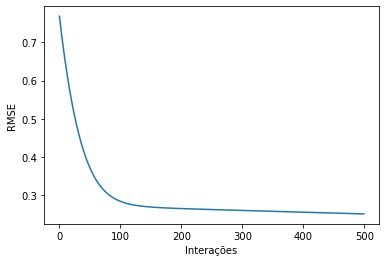

In [123]:
inter=list(range(0,end_inter1_K1))
plt.plot(inter[:500],cost_history1_K1[:500])
plt.xlabel('Interações')
plt.ylabel('RMSE')
plt.show()

### Fitting Y for kick1

iter=0    alpha=0.00    beta=0.0315    MSE=2.5     RMSE=1.6


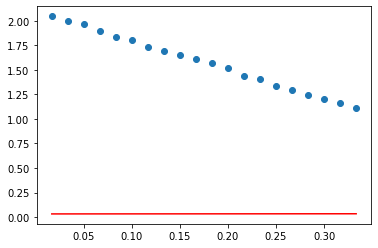

iter=6000    alpha=-1.88    beta=1.9039    MSE=0.012     RMSE=0.11


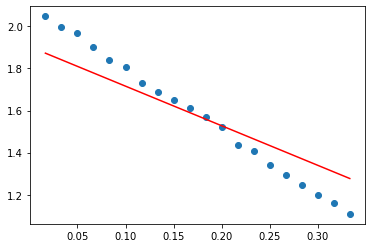

iter=12000    alpha=-2.61    beta=2.0334    MSE=0.0014     RMSE=0.038


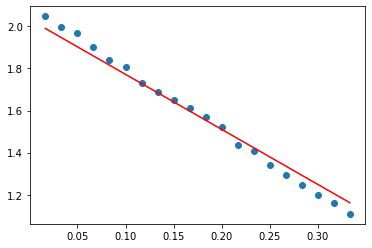

iter=18000    alpha=-2.86    beta=2.0775    MSE=0.00027     RMSE=0.016


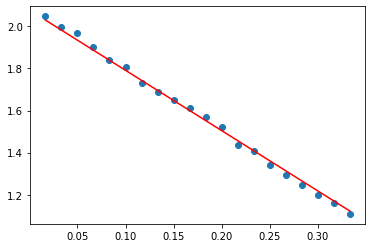

iter=24000    alpha=-2.95    beta=2.0926    MSE=0.00013     RMSE=0.012


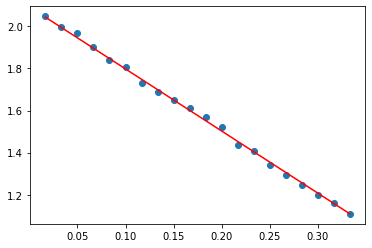

In [124]:
alpha2_K1,beta2_K1,cost_history2_K1,end_inter2_K1 = fit_linear(T,Y1,alpha_inicial,beta_inicial,learning_rate,inters)

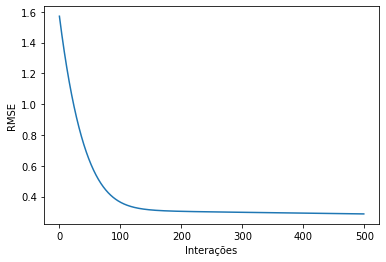

In [125]:
inter=list(range(0,end_inter2_K1+1))
plt.plot(inter[:500],cost_history2_K1[:500])
plt.xlabel('Interações')
plt.ylabel('RMSE')
plt.show()

### Fitting Z for kick1

iter=0    alpha=0.00    beta=0.0024    MSE=0.014     RMSE=0.12


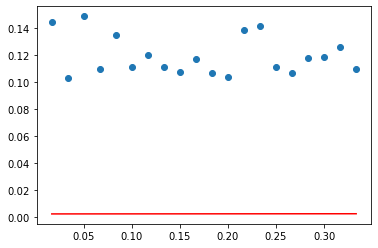

iter=6000    alpha=-0.01    beta=0.1218    MSE=0.0002     RMSE=0.014


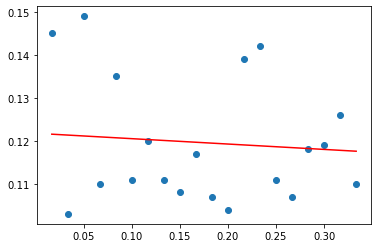

iter=12000    alpha=-0.02    beta=0.1237    MSE=0.00019     RMSE=0.014


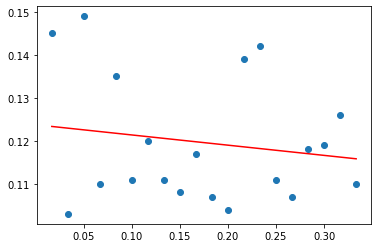

iter=18000    alpha=-0.03    beta=0.1244    MSE=0.00019     RMSE=0.014


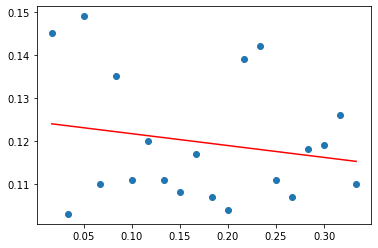

In [126]:
alpha3_K1,beta3_K1,cost_history3_K1,end_inter3_K1 = fit_linear(T,Z1,alpha_inicial,beta_inicial,learning_rate,inters)

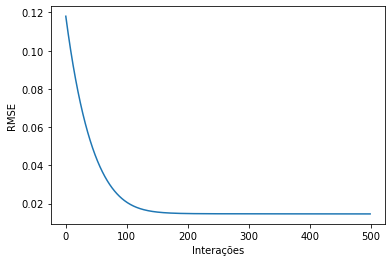

In [127]:
inter=list(range(0,end_inter3_K1+1))
plt.plot(inter[:500],cost_history3_K1[:500])
plt.xlabel('Interações')
plt.ylabel('RMSE')
plt.show()

### Equações finais para Kick1 modelo de regressão linear

In [139]:
print('X = {:.2f} * t + {:.2f}'.format(alpha1_K1,beta1_K1))
print('Y = {:.2f} * t + {:.2f}'.format(alpha2_K1,beta2_K1))
print('Z = {:.2f} * t + {:.2f}'.format(alpha3_K1,beta3_K1))

X = 2.96 * t + 0.21
Y = -2.98 * t + 2.10
Z = -0.03 * t + 0.12


## KICK 2

### Fitting X for kick2

iter=0    alpha=0.00    beta=0.0073    MSE=0.15     RMSE=0.38


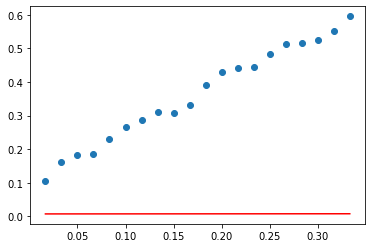

iter=6000    alpha=0.99    beta=0.1905    MSE=0.0024     RMSE=0.049


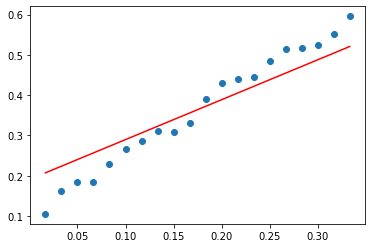

iter=12000    alpha=1.31    beta=0.1346    MSE=0.0005     RMSE=0.022


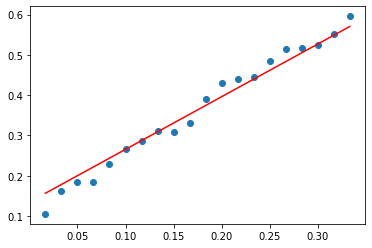

iter=18000    alpha=1.42    beta=0.1155    MSE=0.00028     RMSE=0.017


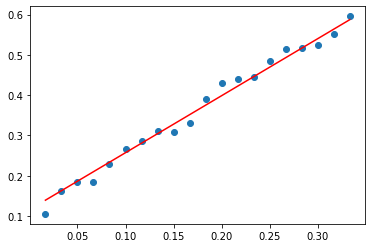

iter=24000    alpha=1.45    beta=0.1090    MSE=0.00025     RMSE=0.016


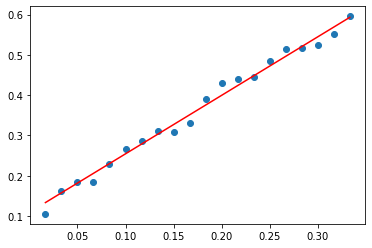

In [128]:
alpha1_K2,beta1_K2,cost_history1_K2,end_inter1_K2 = fit_linear(T,X2,alpha_inicial,beta_inicial,learning_rate,inters)

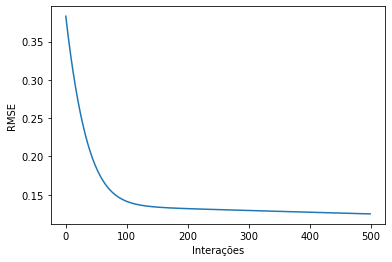

In [129]:
inter=list(range(0,end_inter1_K2+1))
plt.plot(inter[:500],cost_history1_K2[:500])
plt.xlabel('Interações')
plt.ylabel('RMSE')
plt.show()

### Fitting Y for kick2

iter=0    alpha=0.00    beta=0.0315    MSE=2.5     RMSE=1.6


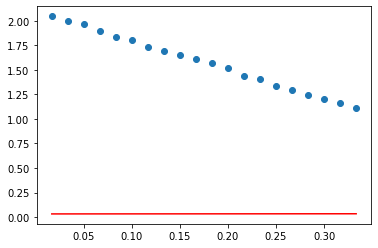

iter=6000    alpha=-1.88    beta=1.9039    MSE=0.012     RMSE=0.11


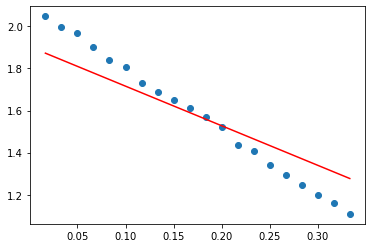

iter=12000    alpha=-2.61    beta=2.0334    MSE=0.0014     RMSE=0.038


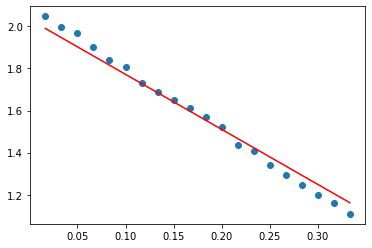

iter=18000    alpha=-2.86    beta=2.0775    MSE=0.00027     RMSE=0.016


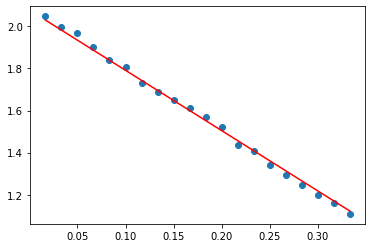

iter=24000    alpha=-2.95    beta=2.0926    MSE=0.00013     RMSE=0.012


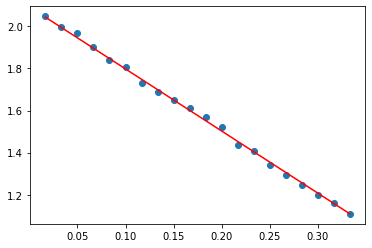

In [130]:
alpha2_K2,beta2_K2,cost_history2_K2,end_inter2_K2 = fit_linear(T,Y2,alpha_inicial,beta_inicial,learning_rate,inters)

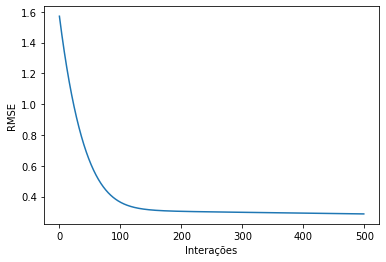

In [131]:
inter=list(range(0,end_inter2_K2+1))
plt.plot(inter[:500],cost_history2_K2[:500])
plt.xlabel('Interações')
plt.ylabel('RMSE')
plt.show()

### Fitting Z for kick2

iter=0    alpha=0.00    beta=0.0048    MSE=0.056     RMSE=0.24


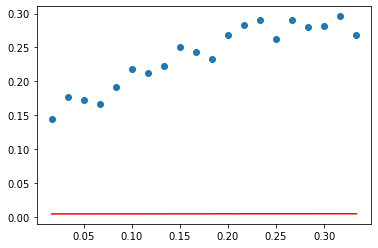

iter=6000    alpha=0.31    beta=0.1844    MSE=0.00047     RMSE=0.022


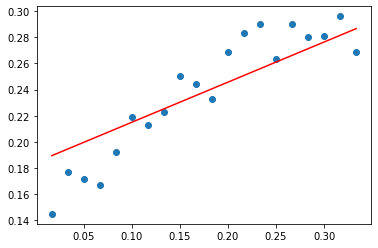

iter=12000    alpha=0.40    beta=0.1684    MSE=0.00031     RMSE=0.018


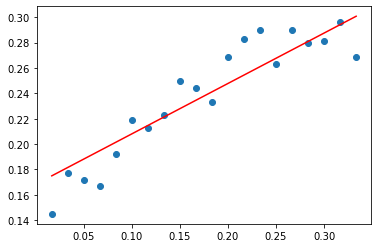

iter=18000    alpha=0.43    beta=0.1629    MSE=0.00029     RMSE=0.017


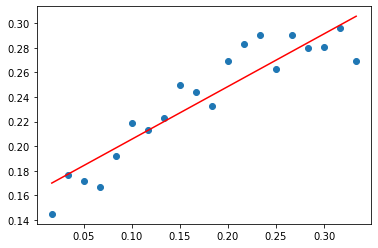

iter=24000    alpha=0.44    beta=0.1611    MSE=0.00029     RMSE=0.017


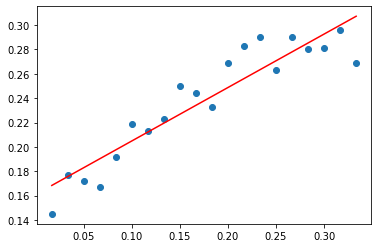

In [132]:
alpha3_K2,beta3_K2,cost_history3_K2,end_inter3_K2 = fit_linear(T,Z2,alpha_inicial,beta_inicial,learning_rate,inters)

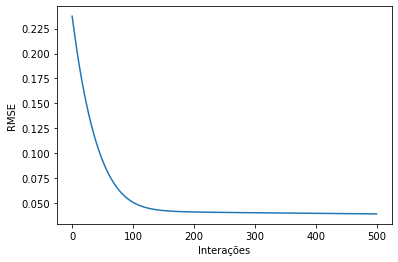

In [133]:
inter=list(range(0,end_inter3_K2+1))
plt.plot(inter[:500],cost_history3_K2[:500])
plt.xlabel('Interações')
plt.ylabel('RMSE')
plt.show()

### Equações finais para Kick2 modelo de regressão linear

In [140]:
print('X = {:.2f} * t + {:.2f}'.format(alpha1_K2,beta1_K2))
print('Y = {:.2f} * t + {:.2f}'.format(alpha2_K2,beta2_K2))
print('Z = {:.2f} * t + {:.2f}'.format(alpha3_K2,beta3_K2))

X = 1.47 * t + 0.11
Y = -2.98 * t + 2.10
Z = 0.44 * t + 0.16


# Construindo o modelo de Regressão Polinomial

## Equações:

Devemos estabelecer um modelo de regressão para cada eixo, baseado no tempo.
<br><br>
$X=$ $\alpha_1*t$ + $\beta_1$ + $\epsilon$<br>
$Y=$ $\alpha_2*t$ + $\beta_2$ + $\epsilon$<br>
$Z=$ $\gamma_3*t²$ + $\alpha_3*t$ + $\beta_3$ + $\epsilon$, where $\gamma_3$ = 9.8 m/s²

### Definindo as funções de pesos e de fit_polinomial

In [ ]:
def cost_function_pol(T,X,alpha,beta):
    '''MSE   RMSE'''
    x_hat_list=[]
    total_error=0.0
    N=len(X)
    for i in range(N):
        x_hat = alpha * T[i] + beta
        x_hat_list.append(x_hat)
        total_error += (X[i] - x_hat )**2
    mse = total_error/N
    rmse = np.sqrt(mse)
    return mse , rmse , x_hat_list

def update_weights_pol(T,X,alpha,beta,learning_rate):
    alpha_deriv=0
    beta_deriv=0
    N=len(X)
    for i in range(N):
        alpha_deriv += -2*T[i] * (X[i] - (alpha*T[i] + beta))
        beta_deriv += -2 * (X[i] - (alpha*T[i] + beta))
        gamma_deriv +=
    alpha -= (alpha_deriv / float(N)) * learning_rate
    beta -= (beta_deriv / float(N)) * learning_rate
    return alpha, beta



def fit_polinomial(T, X, alpha, beta, learning_rate, iters):
    cost_history = []
    space_inter=iters/5
    mse_fim=0
    rmse_fim=0
    for i in range(int(iters)):
        alpha,beta = update_weights_pol(T, X, alpha, beta, learning_rate)

        #Calculate cost for auditing purposes
        mse_ini,rmse_ini,x_hat = cost_function_pol(T, X, alpha, beta)
        cost_history.append(rmse_ini)
        
        #Checking for the tolerance of the error
        tol_rmse = np.abs(rmse_ini-rmse_fim)
        tol_mse = np.abs(mse_ini-mse_fim)
        if tol_rmse < 1e-10:
            break
        mse_fim=mse_ini
        rmse_fim=rmse_ini
        
        # Log Progress
        if i % space_inter == 0:
            print ("iter={:d}    alpha={:.2f}    beta={:.4f}    MSE={:.2}     RMSE={:.2}".format(i, alpha, beta, mse_fim, rmse_fim))
            plt.scatter(T,X)
            plt.plot(T,x_hat,c='red')
            plt.show()
    return alpha, beta, cost_history, i